In [2]:
import matplotlib.pyplot as plt
import numpy as np

## SOEE3250/SOEE5675M/SOEE5116					

Inverse Theory

# Practical 5: Non-uniqueness and SVD
In this practical we will investigate non-uniqueness: model null spaces, data null spaces, and the generalised inverse that we discussed in lectures. We will begin by confirming some of the results in lecture 5, before trying a more complicated example.

# Example 1:
In this simple example, a single seismic wave (whose wave front here is modelled as a ray) passes through two blocks of width 1, of unknown slowness. Here, everything is presented relative to a reference model, so we use relative travel times and relative slowness.


<img src="../Figures/Prac5_fig1.png" alt="drawing" style="width:700px;"/>
Figure 1. Example 1 in the lecture: a single ray constraints two slowness values.


Q1) How large is the data vector (note that I haven't given you any data values)?
What is the model vector?
The matrix G that links the two is given below: note that the SVD function expects a matrix and not a vector, hence the need for double square brackets.

The data vector is of length 1, the model vector of length 2.

In [3]:
G = np.array([[1,1]])  #This is a matrix with one row
#G = np.array([1,1])  #This is a vector, and the SVD function will fail if you use this.

In [4]:
np.linalg.svd?

Signature:       np.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)
Call signature:  np.linalg.svd(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function svd at 0x7f12c8223b00>
File:            /opt/conda/lib/python3.11/site-packages/numpy/linalg/linalg.py
Docstring:      
Singular Value Decomposition.

When `a` is a 2D array, and ``full_matrices=False``, then it is
factorized as ``u @ np.diag(s) @ vh = (u * s) @ vh``, where
`u` and the Hermitian transpose of `vh` are 2D arrays with
orthonormal columns and `s` is a 1D array of `a`'s singular
values. When `a` is higher-dimensional, SVD is applied in
stacked mode as explained below.

Parameters
----------
a : (..., M, N) array_like
    A real or complex array with ``a.ndim >= 2``.
full_matrices : bool, optional
    If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
    ``(..., N, N)``, respectively.  Otherwise, the shapes are
    ``(..., M, K)`` and ``(..., K, N)``, resp

You will see that the function does NOT return U, S and V, but rather U, the diagonal elements of S, and V transposed.

In [5]:
U,diagS,Vt = np.linalg.svd(G)

Q3) How many non-zero singular values are there? What is N and M in this problem? Is there a model null space or a data null space? If so, display spanning vectors on the screen. Is this the same as presented in the lecture?

p=1, N=1, M=2. There is no data null space, but there is a model null space, spanned by the 2nd column of V

In [6]:
print( Vt.transpose()[:,1])

[-0.70710678  0.70710678]


# Example 2:
This is example 2 in the lecture: we now have two rays and one block.

<img src="../Figures/Prac5_fig2.png" alt="drawing" style="width:700px;"/>
Figure 2. Example 2 in the lecture: two rays constrain a single slowness values.


Q4) What size are the data and model vectors? In Python, define the matrix G.

In [7]:
G = np.array([[1],[1]])

Q5) Calculate the SVD decomposition of G, and write down how many non-zero singular values there are.

In [8]:
U,diagS,Vt = np.linalg.svd(G)

In [9]:
print(diagS)

[1.41421356]


Q6) Are there model or data null spaces? If so, display spanning vectors of these spaces. Does this match with what was presented in the lecture?

p=1, N=2, M=1. There is a data null space (see below, which is proportional to the vector given in the lectures) but no model null space.

In [10]:
print(U[:,1])

[-0.70710678  0.70710678]


# Example 3

The figure below shows a 2-D seismic tomography experiment carried out in a laboratory on a piece of rock measuring 30 mm by 20 mm.  The red lines represent the paths of five seismic rays through the rock, the measured travel times for each of which is given below:

<img src="../Figures/Prac5_fig4.png" alt="drawing" style="width:400px;"/>
 

| Ray number   | Time ($\mu$s)   |
| :------ |---------:|
|  1  | 5.43 |
|  2 | 3.18 |
| 3 | 3.65 | 
| 4 | 5.50 |
| 5 | 4.35 |

In the model set-up, the rock is divided into six 10x10 mm blocks as shown, and ordered according to their number in the bottom right hand corner of each block. The goal is to determine the slowness of each the blocks (slowness is assumed constant in each block).



In [11]:
d = np.array([5.43,3.18,3.65,5.5,4.35])

Q8) Define the matrix G for the problem: amend the following (the first row is done for you). Do not approximate any lengths (e.g. np.sqrt(200)), but use the full value.

G = np.array([ [10, 0, 10, 0, 10, 0]])

In [12]:
G = np.array([[10,0,10,0,10,0],[10, 10, 0, 0, 0, 0],
  [0, 0, 10, 10, 0 ,0],[0, np.sqrt(200), np.sqrt(200),0,0,0],
 [np.sqrt(200), 0, 0,  np.sqrt(200),  0, 0]] )

In [13]:
print(G)

[[10.          0.         10.          0.         10.          0.        ]
 [10.         10.          0.          0.          0.          0.        ]
 [ 0.          0.         10.         10.          0.          0.        ]
 [ 0.         14.14213562 14.14213562  0.          0.          0.        ]
 [14.14213562  0.          0.         14.14213562  0.          0.        ]]


Q9) Calculate the SVD decomposition of G and display to the screen the singular values.
How many non-zero singular values are there? Remember that computer arithmetic is not exact and so values within about $10^{-15}$ of zero should be treated as zero.

In [14]:
U,diagS,Vt = np.linalg.svd(G)
V = Vt.transpose()
print(diagS)

[2.71519453e+01 2.00000000e+01 1.41421356e+01 1.27582079e+01
 1.70125055e-15]


There are 4 non-zero singular values.

Q10) Define Up and Vp to contain the non-null parts of U and V, and define the matrix Sp using the np.diag() command and the non-zero singular values. Remember you can choose the first n columns of a matrix y by using y[:,0:n]

In [15]:
Up = U[:,0:4]
Vp = V[:,0:4]
Sp = np.diag(diagS[0:4])

Q11) Confirm that G is equal to Up * Sp * Vp^T. To do this, calculate the matrix norm (like a vector norm, but for matrices) of the difference of the two matrices (NOT the difference of the norms), using np.linalg.norm(). A small matrix norm indicates a small matrix: i.e. if A-B has a small norm, then $A \approx B$. 

In [16]:
np.linalg.norm( G - Up @ Sp @ Vp.transpose() )

1.63934782807559e-14

Q12) Using the matrices Up, Sp, and Vp, calculate m_hat as G_invg times $\bf d$, where the generalised Moore-Penrose pseudoinverse G_invg needs to be evaluated. Do not use the pseudo-inverse function np.linalg.pinv().
Display m_hat to the screen.

In [17]:
G_invg = Vp @ np.linalg.inv(Sp) @ Up.transpose()
m_hat = G_invg @ d
print(m_hat)

[0.19017069 0.13232936 0.25432933 0.11517072 0.09849997 0.        ]


Q13) Define d_hat, the model-predicted values of slowness (d_hat = G * m_hat )

In [18]:
d_hat = G @ m_hat

In [19]:
print(d_hat)

[5.43       3.2250006  3.6950006  5.46817977 4.31817977]


Q14) Plot the estimated slownesses m_hat as square blocks (as in Fig. 4). To do this:

- reshape your m_hat vector into a 2 x 3 matrix.
- use the command imshow to display, and the extent argument to specify the size.
- add a colorbar


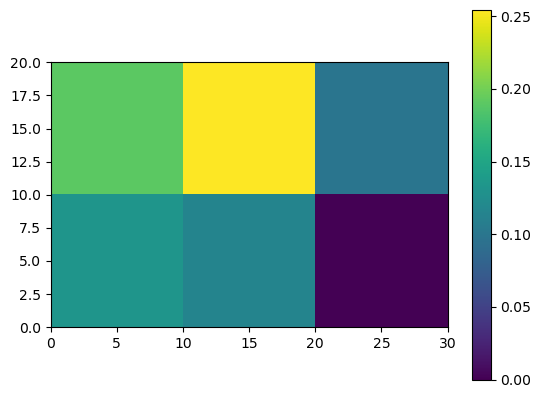

In [20]:
plt.figure()
plt.imshow(m_hat.reshape((2,3), order='F'),extent=[0, 30, 0, 20])
plt.colorbar();

Q15) There is a model nullspace - but how do you know? What two vectors span this space?
Display each of the spanning vectors as a plot similar to the above. Try to explain the physical significance of these model vectors.

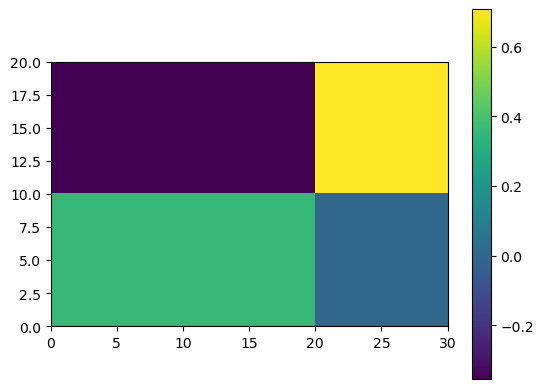

In [21]:
plt.figure()
plt.imshow(V[:,4].reshape((2,3),order='F'),extent=[0, 30, 0, 20])
plt.colorbar();

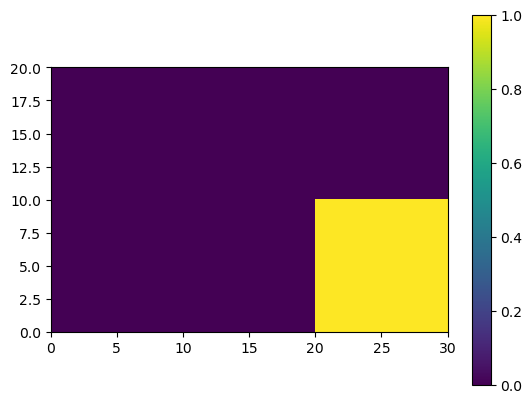

In [22]:
plt.figure()
plt.imshow(V[:,5].reshape((2,3),order='F'),extent=[0, 30, 0, 20])
plt.colorbar();

Q16) Add some combination of these two vectors to m_hat, and check that this new model would recreate the same synthetic travel times as d_hat.

In [23]:
m_new = m_hat + 10 * V[:,4] + 50 * V[:,5]
print( G @ m_new )
print( G @ m_hat )

[5.43       3.2250006  3.6950006  5.46817977 4.31817977]
[5.43       3.2250006  3.6950006  5.46817977 4.31817977]


Q17) Calculate the data residuals: d - d_hat. This is the part of the data that is not representable by the model.
There is a data null space, but how do you know from the SVD? Which vector spans this subspace? Confirm that it is proportional to the data residual.

In [24]:
data_residual = d - d_hat

In [25]:
print(data_residual)


[-8.88178420e-16 -4.50005982e-02 -4.50005982e-02  3.18202282e-02
  3.18202282e-02]


In [26]:
print( U[:,4])  # this is the data null space

[ 1.18893304e-16  5.77350269e-01  5.77350269e-01 -4.08248290e-01
 -4.08248290e-01]


In [27]:
print('Rescaled data null space vector :', U[:,4]/U[1,4] * data_residual[1]) #rescale
print('Data difference ', data_residual)

Rescaled data null space vector : [-9.26693913e-18 -4.50005982e-02 -4.50005982e-02  3.18202282e-02
  3.18202282e-02]
Data difference  [-8.88178420e-16 -4.50005982e-02 -4.50005982e-02  3.18202282e-02
  3.18202282e-02]
